In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv('./../../data/cifar-100/annotations.csv')
outlier_indices = csv[csv['time'] > 30].index
csv.drop(outlier_indices, inplace=True)
csv.head()

,Unnamed: 0,annotation,batch_i,id,ordering,time,truth,ts,volunteer
0,0,large_natural_outdoor_scenes,1.0,salt_flat_s_000007.png,random,10.437215,large_natural_outdoor_scenes,1.578040e+09,NaN
1,1,vehicles_2,1.0,motor_mower_s_000009.png,random,4.033170,vehicles_2,1.578040e+09,NaN
2,2,flowers,1.0,poppy_s_000103.png,random,4.200701,flowers,1.578040e+09,NaN
3,3,large_man-made_outdoor_things,1.0,slip_road_s_000506.png,random,12.164340,large_man-made_outdoor_things,1.578040e+09,NaN
4,4,vehicles_1,2.0,minibike_s_001498.png,random,3.457439,vehicles_1,1.578040e+09,NaN


In [3]:
csv['correct'] = np.where(csv['annotation'] == csv['truth'], 1, 0)
csv.head()

,Unnamed: 0,annotation,batch_i,id,ordering,time,truth,ts,volunteer,correct
0,0,large_natural_outdoor_scenes,1.0,salt_flat_s_000007.png,random,10.437215,large_natural_outdoor_scenes,1.578040e+09,NaN,1
1,1,vehicles_2,1.0,motor_mower_s_000009.png,random,4.033170,vehicles_2,1.578040e+09,NaN,1
2,2,flowers,1.0,poppy_s_000103.png,random,4.200701,flowers,1.578040e+09,NaN,1
3,3,large_man-made_outdoor_things,1.0,slip_road_s_000506.png,random,12.164340,large_man-made_outdoor_things,1.578040e+09,NaN,1
4,4,vehicles_1,2.0,minibike_s_001498.png,random,3.457439,vehicles_1,1.578040e+09,NaN,1


In [4]:
mean_by_orderings = csv.groupby('ordering')[['time', 'correct']].mean()
mean_by_orderings

,time,correct
ordering,,
epsilon_random,12.624218,1.000000
random,3.957557,0.714286
same,3.597299,0.500000


(0, 25)

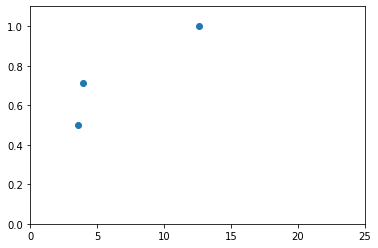

In [5]:
plt.plot(mean_by_orderings['time'], mean_by_orderings['correct'], 'o')
plt.ylim(0.0, 1.1)
plt.xlim(0,25)
